In [3]:
!python3 --version

Python 3.7.3


## Libraries

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [13]:
train_on_gpu = torch.cuda.is_available()
print(f"train_on_gpu = {train_on_gpu}")

train_on_gpu = False


In [15]:
data_raw = pd.read_csv('input/sign_mnist_train.csv', sep=",")
test_data_raw = pd.read_csv('input/sign_mnist_test.csv', sep=",")

labels = data_raw['label']
data_raw.drop('label', axis=1, inplace=True)
labels_test = test_data_raw['label']
test_data_raw.drop('label', axis=1, inplace=True)

data = data_raw.values
labels = labels.values
test_data = test_data_raw.values
labels_test = labels_test.values

In [34]:
print(f"Data({len(data)}): \n{data}")
print()
print(f"Data({len(test_data)}): \n{test_data}")

Data(27455): 
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]

Data(7172): 
[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]


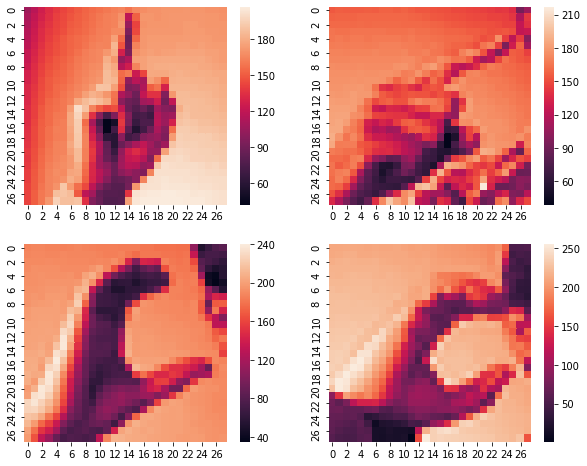

In [25]:
plt.figure(figsize=(10, 8))

for i, val in enumerate([1, 2, 3, 15]):
    pixels = data[i].reshape(28, 28)
    plt.subplot(220 + i + 1)
    sns.heatmap(data=pixels)

In [52]:
import string

alph = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:"f", 6:'g', 7:'h', 8:'i', 9:'j', 10:'k', 11:'l', 12:'m', 13:'n',
        14:'o', 15:'p', 16:'q', 17:'r', 18:'s', 19:'t', 20:'u', 21:'v', 22:'w', 23:'x', 24:'y', 25:'z'}

In [54]:
@interact(i = (0, len(data)))
def show_image_dataset(i):
    pixels = data[i].reshape(28, 28)
    sns.heatmap(data=pixels, cmap="YlGnBu")
    plt.title(alph[labels[i]], fontsize =20)

interactive(children=(IntSlider(value=13727, description='i', max=27455), Output()), _dom_classes=('widget-int…

In [36]:
def reshape_to_2d(data, dim):
    reshaped = []
    for i in data:
        reshaped.append(i.reshape(1, dim, dim))

    return np.array(reshaped)

In [37]:
data = reshape_to_2d(data, 28)

x = torch.FloatTensor(data)
y = torch.LongTensor(labels.tolist())

test_labels = torch.LongTensor(labels_test.tolist())

test_data_formated = reshape_to_2d(test_data, 28)
test_data_formated = torch.FloatTensor(test_data_formated)

In [38]:
test_data_formated

tensor([[[[149., 149., 150.,  ..., 150., 150., 149.],
          [150., 150., 150.,  ..., 151., 150., 151.],
          [150., 151., 151.,  ..., 151., 151., 152.],
          ...,
          [ 69.,  69.,  77.,  ..., 116., 113., 118.],
          [ 74.,  75.,  76.,  ..., 110., 116., 113.],
          [ 75.,  74.,  74.,  ..., 112., 120., 107.]]],


        [[[126., 128., 131.,  ..., 133., 134., 132.],
          [129., 132., 134.,  ..., 136., 136., 134.],
          [133., 135., 138.,  ..., 140., 139., 138.],
          ...,
          [173., 174., 177.,  ..., 184., 182., 181.],
          [172., 174., 177.,  ..., 184., 182., 181.],
          [172., 174., 177.,  ..., 184., 182., 180.]]],


        [[[ 85.,  88.,  92.,  ..., 182., 181., 178.],
          [ 86.,  88.,  93.,  ..., 183., 181., 179.],
          [ 86.,  89.,  93.,  ..., 185., 183., 181.],
          ...,
          [ 91.,  94.,  97.,  ..., 224., 222., 221.],
          [ 90.,  92.,  96.,  ..., 225., 224., 222.],
          [ 89.,  91.,  94., 